In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_table('/content/drive/MyDrive/Restaurant_Reviews.tsv')

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
for i in df['Review']:
  print(i)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
Now I am getting angry and I want my damn pho.
Honeslty it didn't taste THAT fresh.)
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
The fries were great too.
A great touch.
Service was very prompt.
Would not go back.
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
I was disgusted because I was pretty sure that was human hair.
I was shocked because no signs indicate cash only.
Highly recommended.
Waitress was a little slow in service.
This place is not worth your time, let alone Vegas.
did not like at all.
The Burrittos Blah!
The food, amazing.
Service is also cute.
I could care les

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [12]:
str_null=[]
for ind,rvw,lkd in df.itertuples():
  if type(sent)==str:
    if sent.isspace():
      str_null.append(ind)

In [13]:
str_null

[]

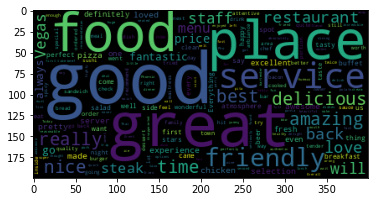

In [14]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Liked']==1]['Review'])))
plt.imshow(wc)
plt.show()


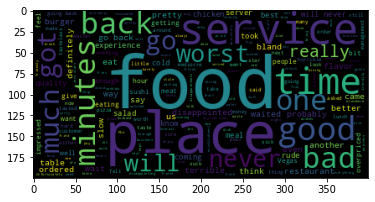

In [15]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Liked']==0]['Review'])))
plt.imshow(wc)
plt.show()


In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
def clean_sent(text):
  #tokenization and case conversion
  token=word_tokenize(text.lower())
  #token--->list of tokens
  #removing non alpha char
  ftoken=[i for i in token if i.isalpha()]
  #ftoken-----> list
  sw=stopwords.words("english")
  stokens=[i for i in ftoken if i not in sw]
  #stokens--->list
  #lemmatization
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stokens]
  #ltoken--->list
  #joining all tokens
  return " ".join(ltoken)

In [21]:
df['Review']=df['Review'].astype('str')

In [22]:
df["Review"]=df["Review"].apply(clean_sent)


In [23]:
df.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1


In [24]:
X=df['Review']

In [25]:
y=df['Liked']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vec=TfidfVectorizer()

In [30]:
vec.fit(X)

TfidfVectorizer()

In [31]:
tr_vec=vec.transform(X)

In [32]:
print(vec.vocabulary_)

{'wow': 1724, 'loved': 890, 'place': 1132, 'crust': 349, 'good': 651, 'tasty': 1527, 'texture': 1538, 'nasty': 997, 'stopped': 1469, 'late': 840, 'may': 928, 'bank': 101, 'holiday': 731, 'rick': 1282, 'steve': 1461, 'recommendation': 1240, 'selection': 1348, 'menu': 947, 'great': 664, 'price': 1171, 'getting': 635, 'angry': 35, 'want': 1669, 'damn': 360, 'pho': 1120, 'honeslty': 734, 'taste': 1523, 'fresh': 608, 'potato': 1161, 'like': 865, 'rubber': 1298, 'could': 322, 'tell': 1532, 'made': 903, 'ahead': 17, 'time': 1560, 'kept': 821, 'warmer': 1672, 'fry': 617, 'touch': 1580, 'service': 1359, 'prompt': 1185, 'would': 1722, 'go': 645, 'back': 92, 'cashier': 229, 'care': 220, 'ever': 509, 'say': 1327, 'still': 1463, 'ended': 490, 'wayyy': 1684, 'overpriced': 1067, 'tried': 1592, 'cape': 216, 'cod': 277, 'ravoli': 1224, 'chicken': 254, 'cranberry': 335, 'mmmm': 969, 'disgusted': 423, 'pretty': 1170, 'sure': 1506, 'human': 753, 'hair': 686, 'shocked': 1371, 'sign': 1384, 'indicate': 783,

In [33]:
vec_words=vec.vocabulary_

In [34]:
vec.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [51]:
for i in vec.get_feature_names_out():
  idx=vec_words.get(i)
  print(f" Word {i} -:{vec.idf_[idx]}")

 Word absolute -:7.215607598755275
 Word absolutely -:5.711530201979001
 Word absolutley -:7.215607598755275
 Word accident -:7.215607598755275
 Word accommodation -:7.215607598755275
 Word accomodate -:7.215607598755275
 Word accordingly -:7.215607598755275
 Word accountant -:7.215607598755275
 Word ache -:7.215607598755275
 Word acknowledged -:6.810142490647111
 Word across -:7.215607598755275
 Word actual -:7.215607598755275
 Word actually -:6.810142490647111
 Word added -:6.810142490647111
 Word affordable -:7.215607598755275
 Word afternoon -:7.215607598755275
 Word ago -:6.52246041819533
 Word ahead -:7.215607598755275
 Word airline -:7.215607598755275
 Word airport -:7.215607598755275
 Word ala -:7.215607598755275
 Word albondigas -:7.215607598755275
 Word allergy -:7.215607598755275
 Word almond -:7.215607598755275
 Word almost -:6.810142490647111
 Word alone -:7.215607598755275
 Word also -:4.576550269140016
 Word although -:6.52246041819533
 Word always -:5.13616605707544
 Wo

In [37]:
X=tr_vec.toarray()

In [84]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=123)


In [85]:
#build logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [86]:
def mymodel(model_obj):
  model_obj.fit(xtrain,ytrain)
  ypred=model_obj.predict(xtest)
  print(classification_report(ytest,ypred))
  return model_obj


In [87]:
lr=LogisticRegression()


In [88]:
mymodel(lr)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       149
           1       0.78      0.73      0.75       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



LogisticRegression()

In [89]:
def result_msg(msg):
  clean_msg=clean_sent(msg)
  x_msg=vec.transform([clean_msg]).toarray()
  pred=lr.predict(x_msg)[0]
  print(pred)

In [90]:
result_msg('The restaurent was worst')

0


In [91]:
result_msg('The restaurent was good')

1


In [92]:
result_msg('The restaurent was not worst')

0


In [93]:
result_msg('The restaurent was not good')

1


In [94]:
result_msg('The restaurent was ok')

0


In [95]:
result_msg('Do not visit it')

1


In [96]:
result_msg('Worst')

0


In [103]:
result_msg('The food was good')

1


In [104]:
result_msg('The food was not good')

1


In [105]:
result_msg('The food was good')

1


In [106]:
result_msg('The food was not good')

1


In [97]:
from sklearn.naive_bayes import GaussianNB  

In [98]:
GNB = GaussianNB() 

In [99]:
mymodel(GNB)

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       149
           1       0.65      0.81      0.72       151

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.68       300
weighted avg       0.70      0.69      0.68       300



GaussianNB()

In [100]:
from sklearn.naive_bayes import MultinomialNB 

In [101]:
MNB=MultinomialNB()

In [102]:
mymodel(MNB)

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       149
           1       0.71      0.81      0.76       151

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.73       300
weighted avg       0.74      0.74      0.73       300



MultinomialNB()

In [107]:
def result_msgmnb(msg):
  clean_msg=clean_sent(msg)
  x_msg=vec.transform([clean_msg]).toarray()
  pred=MNB.predict(x_msg)[0]
  print(pred)

In [108]:
result_msgmnb('The restaurent was good')

1


In [109]:
result_msgmnb('The restaurent was not good')

1


In [110]:
result_msgmnb('The food was good')

1


In [111]:
result_msgmnb('The restaurent was not good')

1


In [114]:
result_msgmnb('The restaurent was worst')

0


In [116]:
result_msgmnb('Worst food ever')

0


In [117]:
result_msgmnb('do not visit')

1


In [118]:
result_msgmnb('do visit')

1


In [119]:
result_msgmnb('not good food')

1


In [120]:
result_msgmnb('not worst food')

0


In [121]:
result_msgmnb('Not good in service')

1
